In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

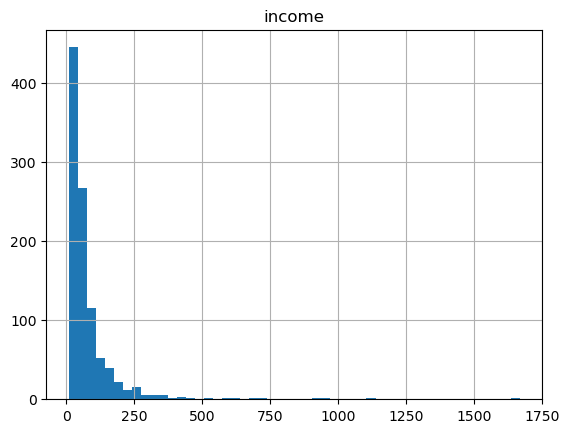

In [4]:
df.hist(column='income',bins=50)

In [5]:
df.columns


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

We need to convert Pandas data frame to Numpy array:

In [6]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

Cheking lables

In [7]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


Data Standardization gives the data zero mean and unit deviation, so KNN algorithms will work well 

In [8]:
X=preprocessing.StandardScaler().fit_transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

## Train Test Split



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set:', X_train.shape,y_train.shape)
print('Test set:', X_test.shape,y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


## Classification

#### KNN

Import library

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Choose k = 4 for now:

In [11]:
k = 4 
#train model and predict
neigh=KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predictnig

Using model to make prediction on the test set:

In [12]:
yhat=neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

## Accurancy evaluation

in multilabel classification score is a funtion that computes subset accuracy. This function is equal to the jaccard_score function. So, it calculates how closely the acutal labels and predicted labels are mathcehd in the test set

In [13]:
from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test,yhat))

Train set accuracy:  0.82875
Test set accuracy:  0.735


## Chosing best K by iteration according to accuracy score


In [14]:
Ks=10
mean_acc=np.zeros((Ks-1))
for i in range (1,Ks):
    Neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    mean_acc[i-1]=metrics.accuracy_score(y_test,neigh.predict(X_test))
mean_acc

array([0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735])